**Cargamos librerias y el DataSet**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

estrellas=pd.read_csv('https://raw.githubusercontent.com/cjramirezt/estrellas/main/estrellas.csv')
estrellas.head()

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud absoluta (m),Color,Clase espectral,Tipo
0,3068,0.002400,0.1700,16.12,Red,M,Enana Roja
1,3042,0.000500,0.1542,16.60,Red,M,Enana Roja
2,2600,0.000300,0.1020,18.70,Red,M,Enana Roja
3,2800,0.000200,0.1600,16.65,Red,M,Enana Roja
4,1939,0.000138,0.1030,20.06,Red,M,Enana Roja


**Identificamos si existen Registros Nulos**

In [ ]:
estrellas.isna().sum()

Temperatura (K)          0
Luminosidad (L/Lo)       0
Radio (R/Ro)             0
Magnitud absoluta (m)    0
Color                    0
Clase espectral          0
Tipo                     0
dtype: int64

**Identificamos la Cantidad de Tipos de Estrellas**

In [ ]:
estrellas['Tipo'].unique()

array(['Enana Roja', 'Enana Marron', 'Enana Blanca',
       'Secuencia Principal', 'Super Gigante', 'Hyper Gigante'],
      dtype=object)

**Ahora Graficamos las columnas de Temperatura, Luminosidad, Radio y Magnitud Absoluta para identificar posibles relaciones entre estas caracterısticas.**

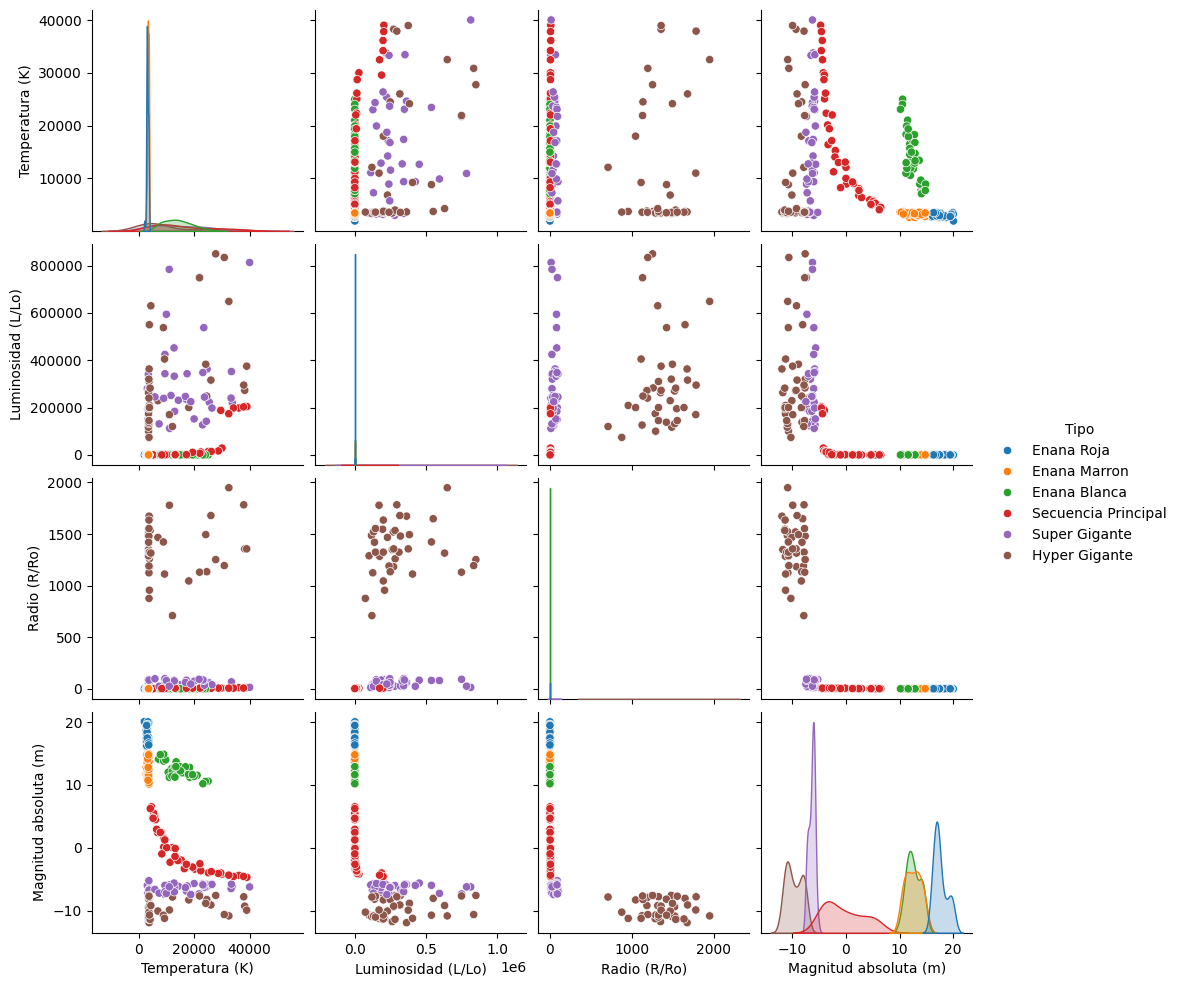

In [ ]:
sns.pairplot(estrellas, hue="Tipo", vars=["Temperatura (K)","Luminosidad (L/Lo)","Radio (R/Ro)", "Magnitud absoluta (m)"])
plt.show()

**Ya teniendo listos los graficos podemos identificar en cual se pueden distinguir de forma mas clara los diferentes tipos de estrellas. Podemos notar que los graficos relacionados con la magnitud absoluta son mas facil de diferenciar.**

**Luego creamos una nueva copia de la base de datos para editarla sin generar cambios en la base de datos original**

In [ ]:
estrellas2 = estrellas.copy()
estrellas2.head()

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud absoluta (m),Color,Clase espectral,Tipo
0,3068,0.002400,0.1700,16.12,Red,M,Enana Roja
1,3042,0.000500,0.1542,16.60,Red,M,Enana Roja
2,2600,0.000300,0.1020,18.70,Red,M,Enana Roja
3,2800,0.000200,0.1600,16.65,Red,M,Enana Roja
4,1939,0.000138,0.1030,20.06,Red,M,Enana Roja


**El siguiente paso sera eliminar la columna "Tipo" y las demas columnas que contengan datos cuantitativos**

In [ ]:
estrellas2 = estrellas2.drop(columns = ['Color', 'Clase espectral'])
estrellas2.head()

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud absoluta (m),Tipo
0,3068,0.002400,0.1700,16.12,Enana Roja
1,3042,0.000500,0.1542,16.60,Enana Roja
2,2600,0.000300,0.1020,18.70,Enana Roja
3,2800,0.000200,0.1600,16.65,Enana Roja
4,1939,0.000138,0.1030,20.06,Enana Roja


In [ ]:
#convertimos los tipos de estrella  'Enana Roja', 'Enana Marron', 'Enana Blanca', 'Secuencia Principal', 'Super Gigante', 'Hyper Gigante' a numeros con un diccionario
species_to_num = {'Enana Roja':0,
                  'Enana Marron':1,
                  'Enana Blanca':2,
                  'Secuencia Principal':3,
                  'Super Gigante':4,
                  'Hyper Gigante':5}
estrellas2['tmp'] = estrellas2['Tipo'].map(species_to_num)
estrellas2.drop('Tipo', axis=1, inplace=True)

In [ ]:
estrellas2

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud absoluta (m),tmp
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0
...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5
236,30839,834042.000000,1194.0000,-10.63,5
237,8829,537493.000000,1423.0000,-10.73,5
238,9235,404940.000000,1112.0000,-11.23,5


**Ahora Dividiremos el dataset en conjuntos de entrenamiento y prueba. Una division comun es el 70% paraentrenamiento y el 30% para prueba.**

In [ ]:
#separamos el dataset en entrenamiento y prueba en una proporcion de 70% y 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(estrellas2.drop('tmp', axis=1), estrellas2['tmp'], test_size=0.3)

In [ ]:
X_train

,Temperatura (K),Luminosidad (L/Lo),Radio (R/Ro),Magnitud absoluta (m)
235,38940,374830.00000,1356.0000,-9.93
230,24145,382993.00000,1494.0000,-8.84
236,30839,834042.00000,1194.0000,-10.63
155,28700,16790.00000,6.4000,-4.09
54,3650,310000.00000,1324.0000,-7.79
...,...,...,...,...
194,3523,0.00540,0.3190,12.43
238,9235,404940.00000,1112.0000,-11.23
99,36108,198000.00000,10.2000,-4.40
174,3600,240000.00000,1190.0000,-7.89


In [ ]:
y_train

235    5
230    5
236    5
155    3
54     5
      ..
194    1
238    5
99     3
174    5
67     0
Name: tmp, Length: 168, dtype: int64

**Normaliza los datos para asegurar que todas las caracterısticas contribuyan de manera equitativa en la clasificacion.**

In [ ]:
#estandarizamos los datos antes de aplicar el algoritmo de clasificacion KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

**Implementacion del Metodo del Codo**

**Utilizar el metodo del codo para determinar el numero optimo de vecinos mas cercanos (k). lo que implica entrenar el modelo k-NN con diferentes valores de k y graficar el error cuadratico promedio para identificar el “codo” en la grafica.**

**Segun el grafico en numero Optimo de K debria ser 3, pero queremos saber si el algoritmo de k podra hacer las proximas divisiones por lo que trabajaremos con K=6**

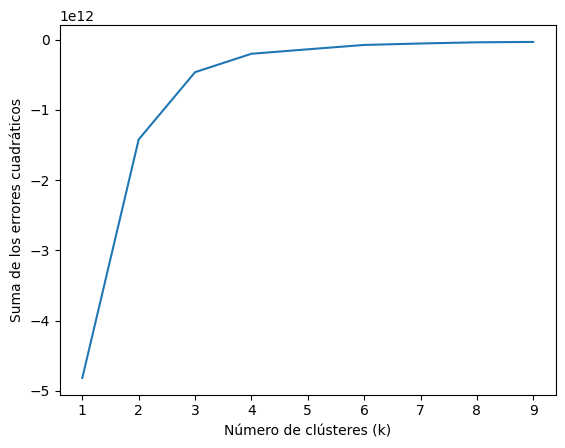

In [ ]:
nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

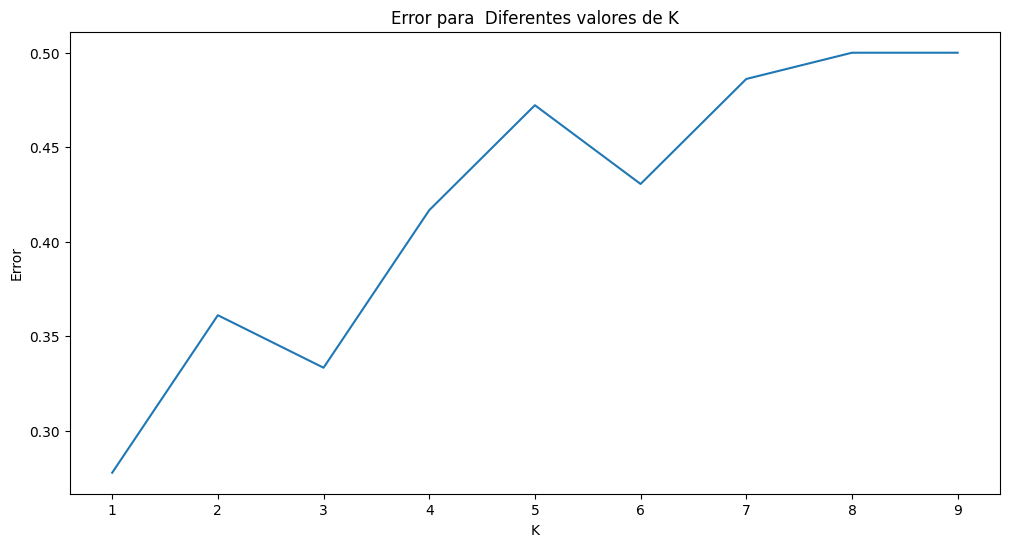

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(estrellas2.drop('tmp', axis=1), estrellas2['tmp'], test_size=0.3)
#estandarizamos los datos antes de aplicar el algoritmo de clasificacion KNN
import matplotlib.pyplot as plt
import numpy as np
error = []

# Calculamos el error para valores de k entre 1 y 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error)
plt.title('Error para  Diferentes valores de K')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

**Implementacion del algoritmo k-NN utilizando la librerıa scikit-learn o cualquier otra, empleando el valor optimo de k determinado anteriormente.**

In [ ]:
#estandarizamos los datos antes de aplicar el algoritmo de clasificacion KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_train

array([[-7.95447549e-01, -5.86083479e-01, -5.01773808e-01,
         9.90284242e-01],
       [ 1.67812592e-01,  5.91517481e-02,  7.96344613e-01,
        -1.12351690e+00],
       [-7.97405173e-01, -5.86083487e-01, -5.02890142e-01,
         1.44691769e+00],
       [ 1.57077701e+00, -5.86083190e-01, -5.03096544e-01,
         6.00087219e-01],
       [ 1.24581130e+00, -5.49799763e-01, -4.90940420e-01,
        -6.28518756e-01],
       [ 1.51531097e+00,  7.50037381e-01,  1.57649514e+00,
        -1.16094587e+00],
       [ 1.23406555e+00,  3.43851754e+00,  1.56824637e+00,
        -1.10760958e+00],
       [-3.08216496e-01, -5.86083490e-01, -5.03095848e-01,
         9.95898588e-01],
       [-7.86638237e-01, -5.86083456e-01, -5.02248570e-01,
         8.05946560e-01],
       [-9.37266587e-01, -5.86083490e-01, -5.02923137e-01,
         1.48715383e+00],
       [-8.37536481e-01, -5.86083486e-01, -5.02968597e-01,
         1.44036762e+00],
       [-8.11543574e-01, -5.86083490e-01, -5.02210076e-01,
      

In [ ]:
#ahora que los datos estan estandarizados, aplicamos el algoritmo de clasificacion KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

**Evaluacion de la Precision del Modelo**

In [ ]:
#hacemos la prediccion con los datos de prueba
X_test = scaler.transform(X_test)
y_pred = knn.predict(X_test)
y_pred

array([1, 2, 1, 4, 2, 1, 4, 1, 0, 1, 3, 1, 0, 5, 1, 3, 1, 4, 1, 5, 5, 5,
       3, 2, 4, 0, 5, 3, 1, 3, 1, 3, 0, 4, 0, 4, 0, 1, 2, 3, 4, 3, 0, 2,
       1, 0, 4, 5, 1, 4, 0, 1, 0, 3, 1, 1, 4, 2, 2, 3, 0, 4, 1, 5, 4, 4,
       3, 3, 3, 1, 2, 4])

In [ ]:
#evaluamos la precision del modelo
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  1 14  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         8
           3       0.92      1.00      0.96        12
           4       1.00      0.93      0.97        15
           5       1.00      1.00      1.00         7

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



In [ ]:
#calculamos el porcentaje de precision del modelo
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9861111111111112


**Al probar el codigo varias veces, el porcentaje de precision del modelo por lo general supera el 90%, por lo que se puede concluir que el algoritmo KNN hizo una division bastante acertada, sin embargo si tomaramos el valor del codo, daria un resultado totalmente diferente y alejado de la realidad.**

**Visualizacion de Clasificaciones**

In [ ]:
# devolvemos los datos a su escala original
X_train = scaler.inverse_transform(X_train)
X_test = scaler.inverse_transform(X_test)
#devolvemos las etiquetas originales a la columna de especies con un diccionario inverso
num_to_species = {0:'Enana Roja',
                  1:'Enana Marron',
                  2:'Enana Blanca',
                  3:'Secuencia Principal',
                  4:'Super Gigante',
                  5:'Hyper Gigante'}

In [ ]:
X_test = pd.DataFrame(X_test,columns=["Temperatura (K)","Luminosidad (L/Lo)","Radio (R/Ro)", "Magnitud absoluta (m)"])
X_test['Tipo'] = y_pred
X_test['Tipo'] = X_test['Tipo'].map(num_to_species)

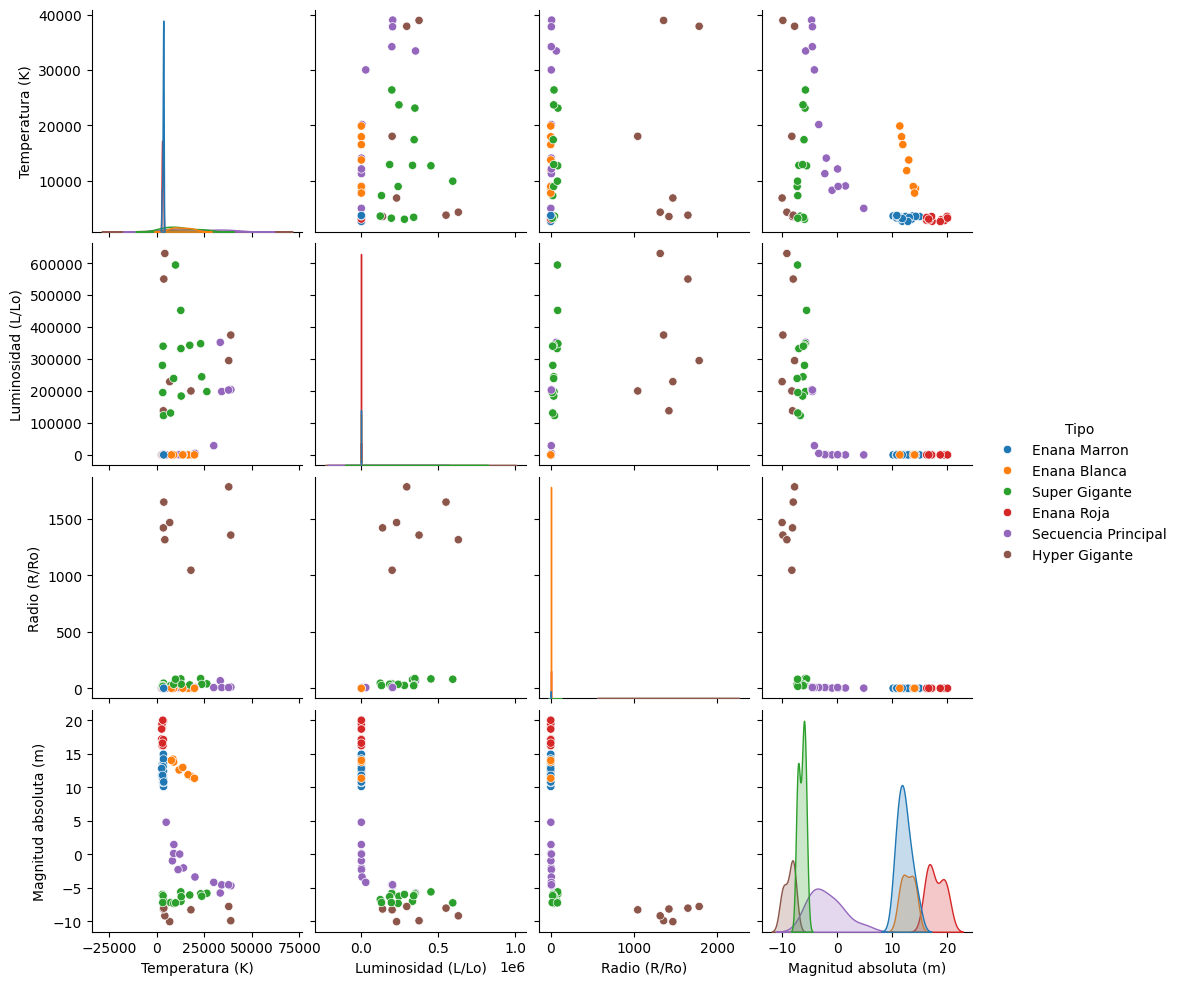

In [ ]:
#ahora hacemos un pair plot con los datos de prueba y las predicciones
sns.pairplot(X_test, hue='Tipo')
plt.show()

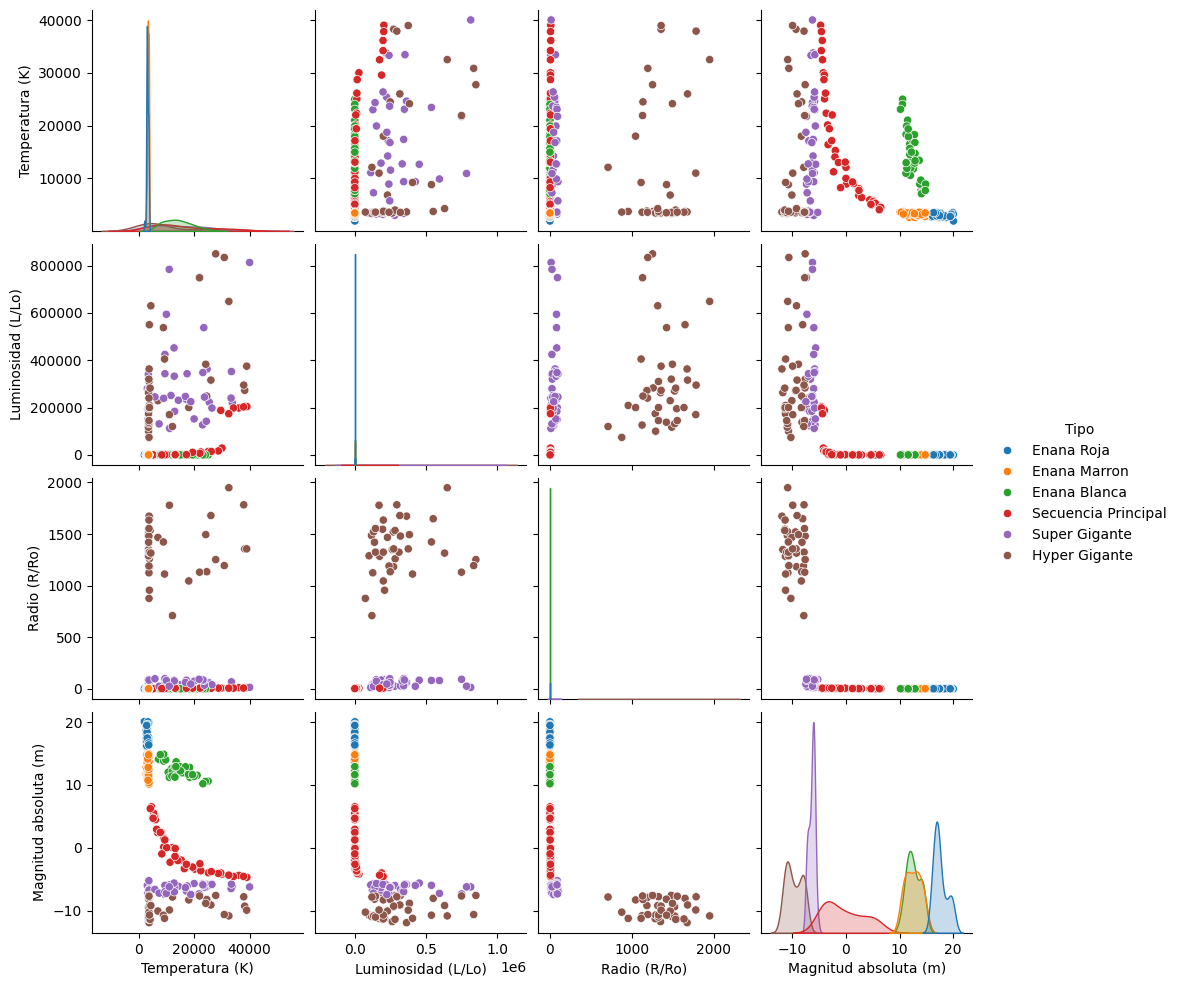

In [ ]:
sns.pairplot(estrellas, hue="Tipo", vars=["Temperatura (K)","Luminosidad (L/Lo)","Radio (R/Ro)", "Magnitud absoluta (m)"])
plt.show()

**Al observar el grafico del conjunto de entrenamiento y el grafico original se puede ver de forma mas clara que los tipos de estrellas se pudieron dividir en grupos correctamente.**

**El desarrollo de este trabajo nos ha permitido explorar la aplicación del algoritmo K-Nearest Neighbors (KNN) en la clasificación de estrellas, destacando la importancia de cada etapa del análisis de datos. Desde el análisis exploratorio inicial hasta la evaluación del modelo, cada paso ha sido fundamental para garantizar resultados precisos y significativos.**

**Uno de los aspectos clave en este proceso fue la normalización de los datos, la cual asegura que todas las características contribuyen equitativamente al modelo y evita que algunas variables con valores más grandes dominen el análisis. Además, la selección del valor óptimo de 𝑘 mediante el método del codo nos permitió encontrar el equilibrio entre sesgo y varianza, optimizando el desempeño del modelo.**

**Por otro lado, la creación de diccionarios para transformar datos cualitativos en representaciones numéricas jugó un papel fundamental en la correcta interpretación de la información, permitiendo que el algoritmo pudiera trabajar con atributos categóricos. Finalmente, la validación del modelo mediante la división en conjuntos de entrenamiento y prueba fue crucial para evaluar su capacidad de generalización y evitar problemas de sobreajuste.**

**Este estudio demuestra cómo la correcta aplicación de técnicas de preprocesamiento, selección de hiperparámetros y validación permite que modelos simples como KNN sean herramientas poderosas para la clasificación y toma de decisiones. En un mundo donde los datos son cada vez más abundantes, el dominio de estas metodologías se vuelve esencial para convertir información en conocimiento útil y aplicable en distintos campos.**